In [3]:
%load_ext autoreload
%autoreload 2

import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import h5py

import sys
sys.path.append('../../src')
from utils import smooth_curve
from Viz import show_images
from PlumeDataset import plume_dataset
from AutoAlign import align_plumes
from Velocity import VelocityCalculator
from PlumeMetrics import PlumeMetrics

In [5]:
df_all = pd.read_csv('../../datasets/PlumeSRO_df.csv', sep='\t', index_col=(0,1))
# df_all = df_all[df_all.index.get_level_values('time_index')>0]
# df_all = df_all[df_all.index.get_level_values('time_index')<28]
df_all

Distance  Velocity  Area Growth
plume_index time_index                                 
0           0               -125       0.0   0.0  YG028
            1               -125       0.0   0.0  YG028
            2               -125       0.0   0.0  YG028
            3               -125       0.0   0.0  YG028
            4               -125       0.0   0.0  YG028
...                          ...       ...   ...    ...
35          251              235       0.0   0.0  YG043
            252              235       0.0   0.0  YG043
            253              235       0.0   0.0  YG043
            254              235       0.0   0.0  YG043
            255              235       0.0   0.0  YG043

[120320 rows x 4 columns]

## YG028, 029, 030

In [18]:
conditions = ['YG028', 'YG029', 'YG030']
df_plot = df_all[df_all['Growth'].isin(conditions)]

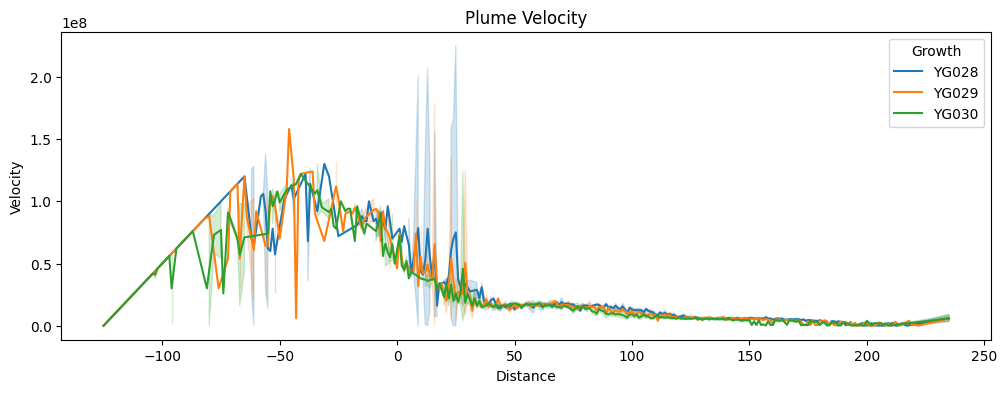

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

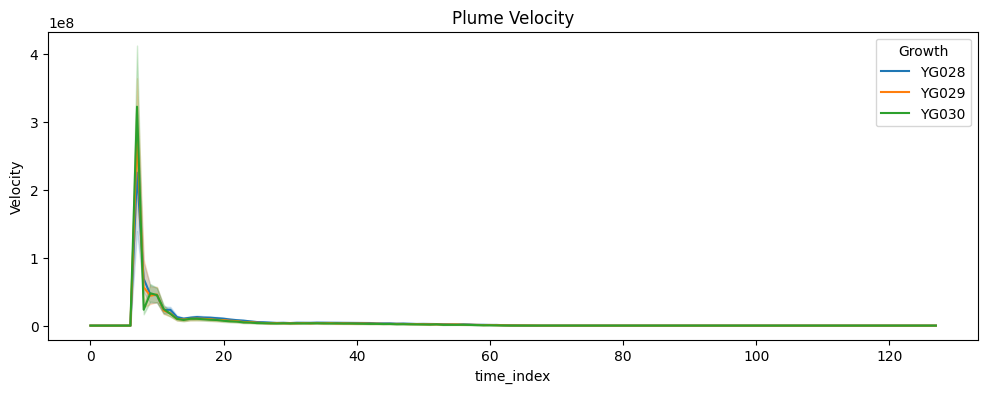

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

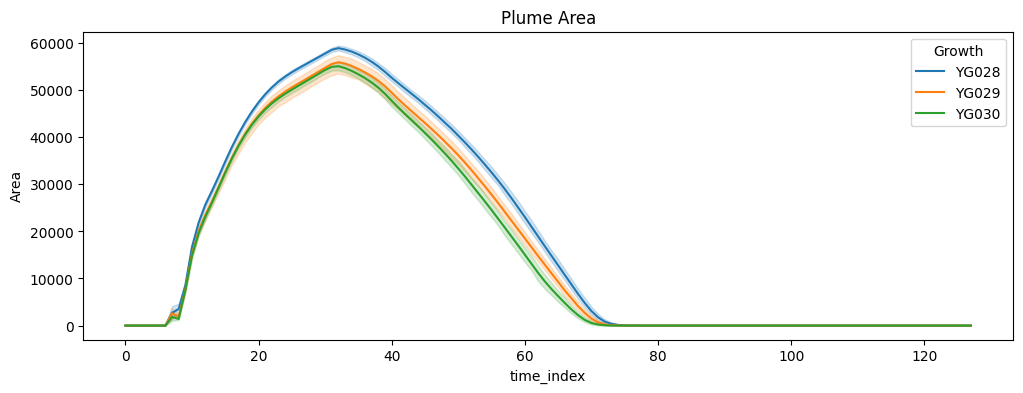

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plot)
plt.title('Plume Area')
plt.show()

### key values

In [19]:
# calculate the average speed for distance between 210 and 220
gc_list = list(df_plot['Growth'].unique())
velocity_dict = {}
for gc in gc_list:
    df_gc = df_plot[df_plot['Growth']==gc]
    df_gc = df_gc[(df_gc['Distance']>0) & (df_gc['Distance']<220)]
    velocity_dict[gc] = df_gc['Velocity'].mean()
print(velocity_dict)

{'YG028': 4096086.9565217393, 'YG029': 3801787.16490658, 'YG030': 3314569.536423841}


In [20]:
# calculate the average speed for distance between 210 and 220
gc_list = list(df_plot['Growth'].unique())
area_dict = {}
for gc in gc_list:
    df_gc = df_plot[df_plot['Growth']==gc]
    area_dict[gc] = df_gc['Area'].max()
print(area_dict)

{'YG028': 64578.0, 'YG029': 61576.0, 'YG030': 59935.0}


In [21]:
df_key_values = pd.DataFrame({'Growth': area_dict.keys(), 'Max Area': area_dict.values(), 'Incident Velocity': velocity_dict.values()})
print(df_key_values)

  Growth  Max Area  Incident Velocity
0  YG028   64578.0       4.096087e+06
1  YG029   61576.0       3.801787e+06
2  YG030   59935.0       3.314570e+06


In [24]:
# Create an interactive scatter plot
fig = px.scatter(df_key_values, x='Max Area', y='Incident Velocity', 
                 text='Growth', 
                 hover_data=['Growth'], title='SrTiO3 Samples',
                 width=800, height=600)

# Update traces to show text on hover only
fig.update_traces(textposition='top center', mode='markers+text')

# Show plot
fig.show()

## YG031, 032, 033, 034

In [34]:
conditions = ['YG031', 'YG033', 'YG034']
df_plot = df_all[df_all['Growth'].isin(conditions)]

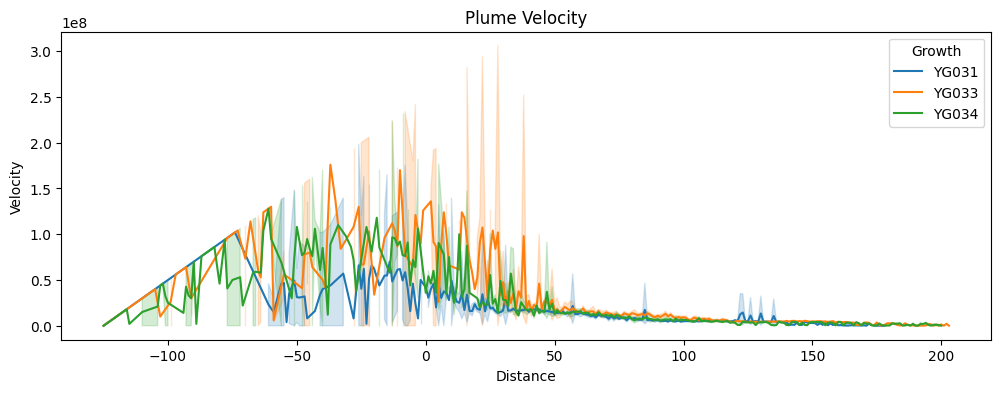

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

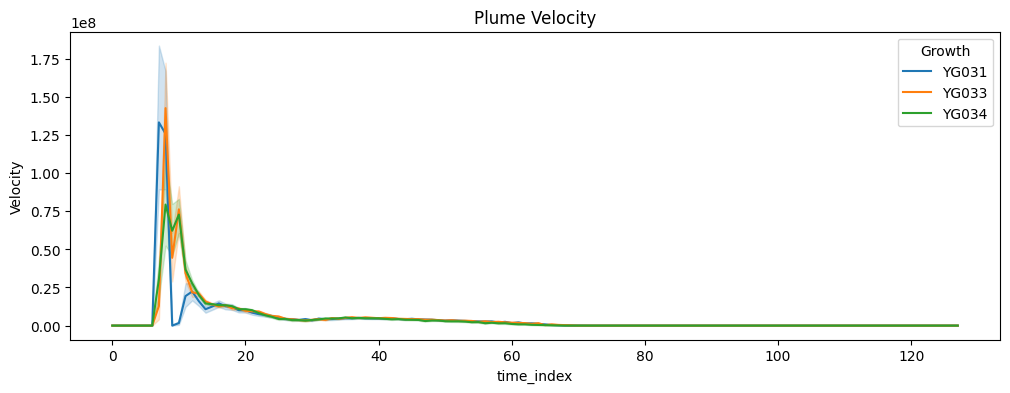

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

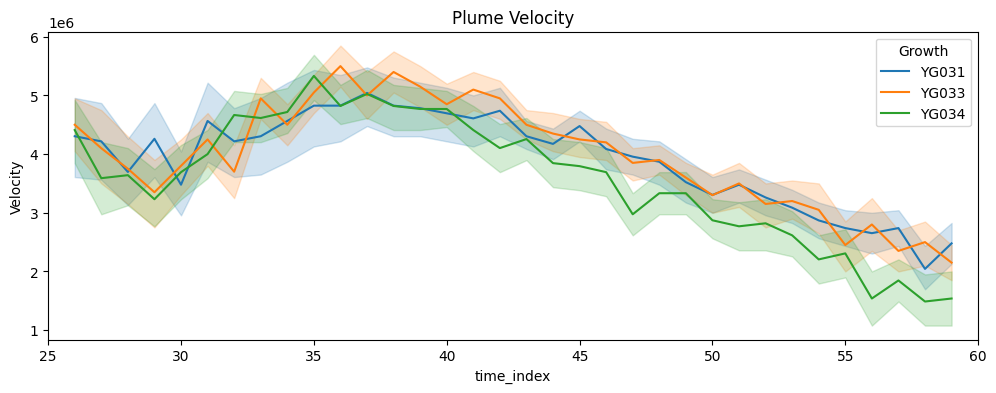

In [37]:
df_plot = df_plot[df_plot.index.get_level_values('time_index')>25]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<60]

fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.xlim(25, 60)
plt.show()

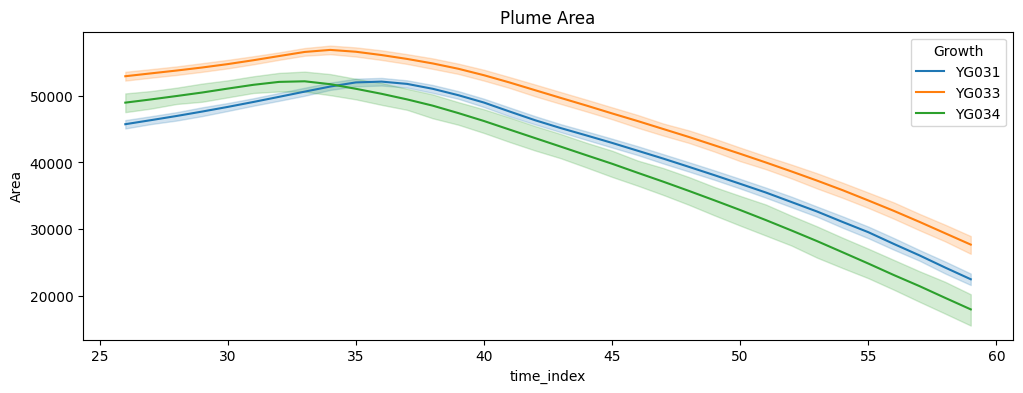

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plot)
plt.title('Plume Area')
plt.show()

### key values

In [39]:
# calculate the average speed for distance between 210 and 220
gc_list = list(df_plot['Growth'].unique())
velocity_dict = {}
for gc in gc_list:
    df_gc = df_plot[df_plot['Growth']==gc]
    df_gc = df_gc[(df_gc['Distance']>0) & (df_gc['Distance']<220)]
    velocity_dict[gc] = df_gc['Velocity'].mean()
print(velocity_dict)

{'YG031': 3911764.705882353, 'YG033': 3970588.2352941176, 'YG034': 3583710.407239819}


In [40]:
# calculate the average speed for distance between 210 and 220
gc_list = list(df_plot['Growth'].unique())
area_dict = {}
for gc in gc_list:
    df_gc = df_plot[df_plot['Growth']==gc]
    area_dict[gc] = df_gc['Area'].max()
print(area_dict)

{'YG031': 55442.0, 'YG033': 60180.0, 'YG034': 59608.0}


In [41]:
df_key_values = pd.DataFrame({'Growth': area_dict.keys(), 'Max Area': area_dict.values(), 'Incident Velocity': velocity_dict.values()})
print(df_key_values)

  Growth  Max Area  Incident Velocity
0  YG031   55442.0       3.911765e+06
1  YG033   60180.0       3.970588e+06
2  YG034   59608.0       3.583710e+06


In [42]:
# Create an interactive scatter plot
fig = px.scatter(df_key_values, x='Max Area', y='Incident Velocity', 
                 text='Growth', 
                 hover_data=['Growth'], title='SrTiO3 Samples',
                 width=800, height=600)

# Update traces to show text on hover only
fig.update_traces(textposition='top center', mode='markers+text')

# Show plot
fig.show()

## YG035, 036, 037, 038

In [6]:
conditions = ['YG035', 'YG036', 'YG037', 'YG038']
df_plot = df_all[df_all['Growth'].isin(conditions)]

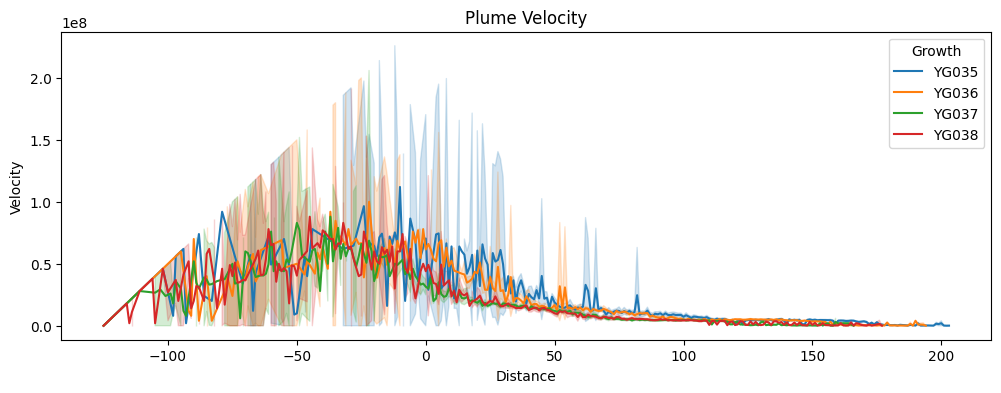

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

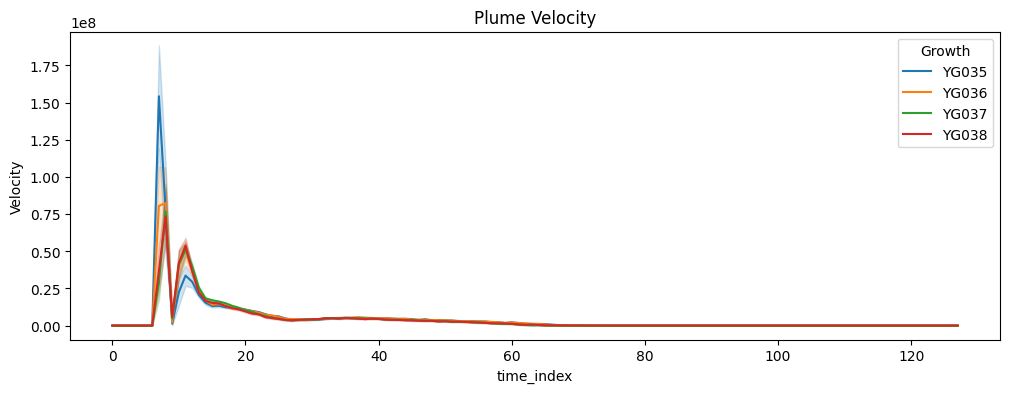

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Growth", data=df_plot)
plt.title('Plume Velocity')
plt.show()

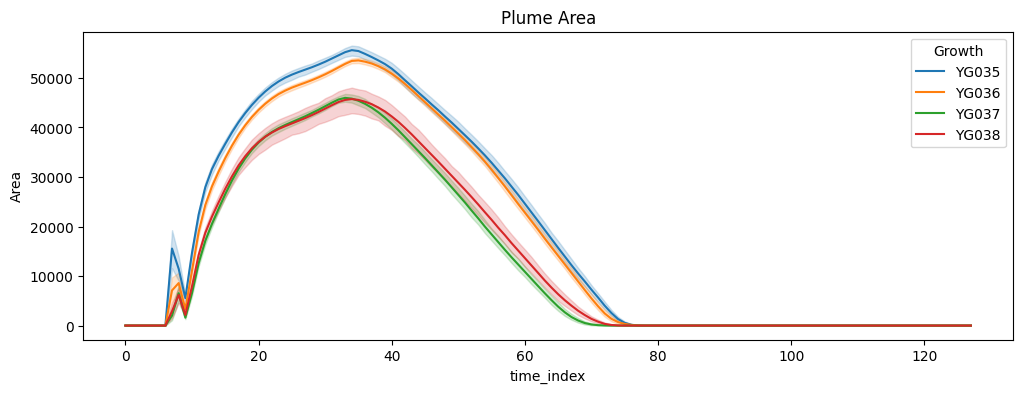

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plot)
plt.title('Plume Area')
plt.show()

### key values

In [10]:
# calculate the average speed for distance between 210 and 220
gc_list = list(df_plot['Growth'].unique())
velocity_dict = {}
for gc in gc_list:
    df_gc = df_plot[df_plot['Growth']==gc]
    df_gc = df_gc[(df_gc['Distance']>0) & (df_gc['Distance']<220)]
    velocity_dict[gc] = df_gc['Velocity'].mean()
print(velocity_dict)

{'YG035': 4015975.4224270354, 'YG036': 3394712.2861586316, 'YG037': 2513428.1200631913, 'YG038': 2713377.871924393}


In [11]:
# calculate the average speed for distance between 210 and 220
gc_list = list(df_plot['Growth'].unique())
area_dict = {}
for gc in gc_list:
    df_gc = df_plot[df_plot['Growth']==gc]
    area_dict[gc] = df_gc['Area'].max()
print(area_dict)

{'YG035': 60134.0, 'YG036': 57948.0, 'YG037': 52638.0, 'YG038': 54499.0}


In [12]:
df_key_values = pd.DataFrame({'Growth': area_dict.keys(), 'Max Area': area_dict.values(), 'Incident Velocity': velocity_dict.values()})
print(df_key_values)

  Growth  Max Area  Incident Velocity
0  YG035   60134.0       4.015975e+06
1  YG036   57948.0       3.394712e+06
2  YG037   52638.0       2.513428e+06
3  YG038   54499.0       2.713378e+06


In [13]:
# Create an interactive scatter plot
fig = px.scatter(df_key_values, x='Max Area', y='Incident Velocity', 
                 text='Growth', 
                 hover_data=['Growth'], title='SrTiO3 Samples',
                 width=800, height=600)

# Update traces to show text on hover only
fig.update_traces(textposition='top center', mode='markers+text')

# Show plot
fig.show()

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

### plume velocity

In [ ]:
conditions = ['2.25mj/cm^2_140mTorr', '1.75mj/cm^2_60mTorr', '1.25mj/cm^2_60mTorr', '2.25mj/cm^2_60mTorr', '1.75mj/cm^2_140mTorr']
df_plot = df_all[df_all['Growth Condition'].isin(conditions)]
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Growth Condition", data=df_plot)
plt.xlim(100, 230)
plt.title('Plume Velocity')
plt.show()

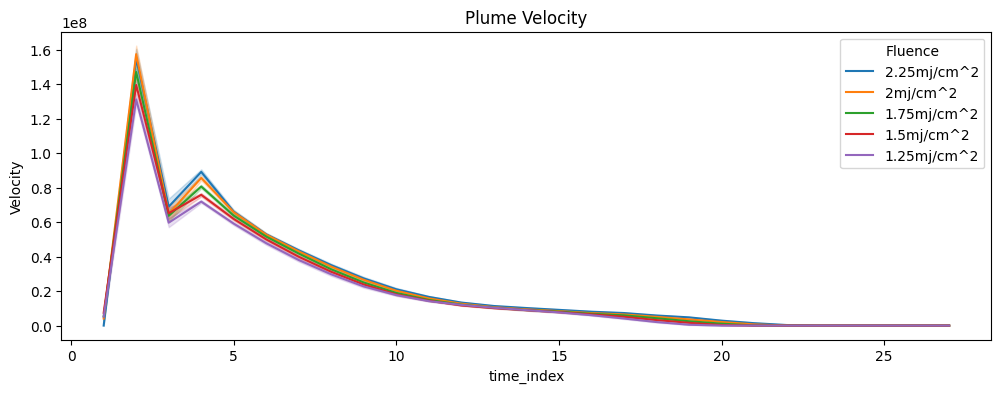

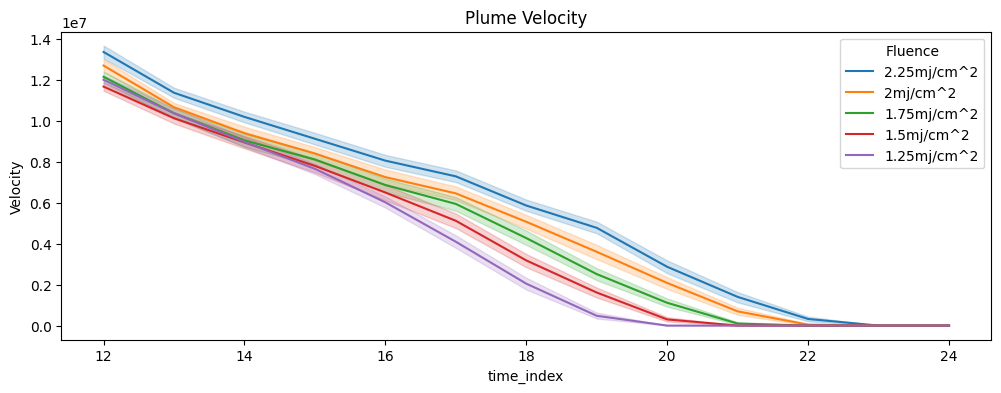

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Fluence", data=df_plot)
plt.title('Plume Velocity')
plt.show()

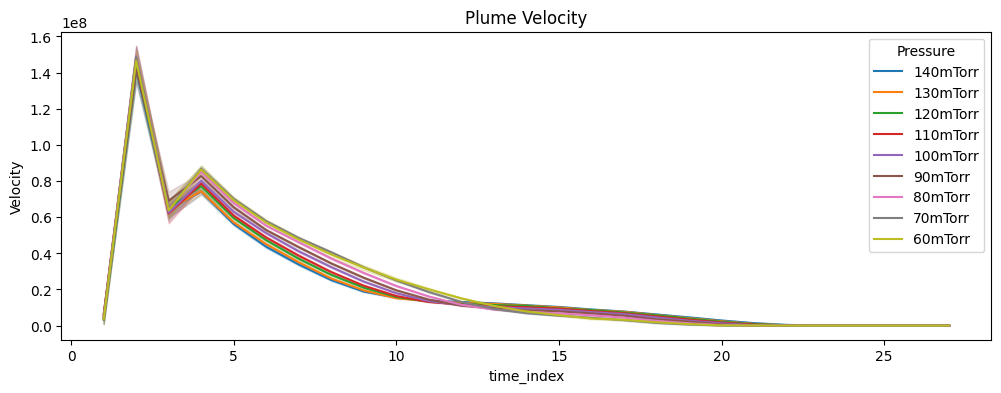

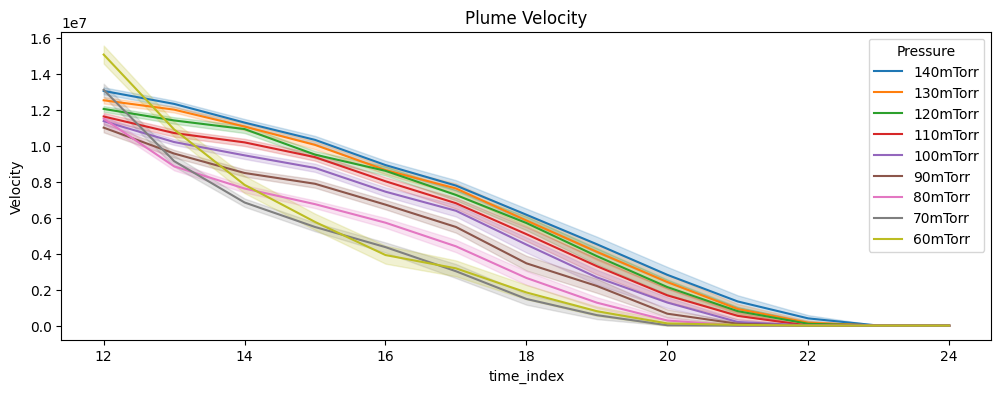

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Pressure", data=df_plot)
plt.title('Plume Velocity')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Pressure", data=df_plot)
plt.title('Plume Velocity')
plt.show()

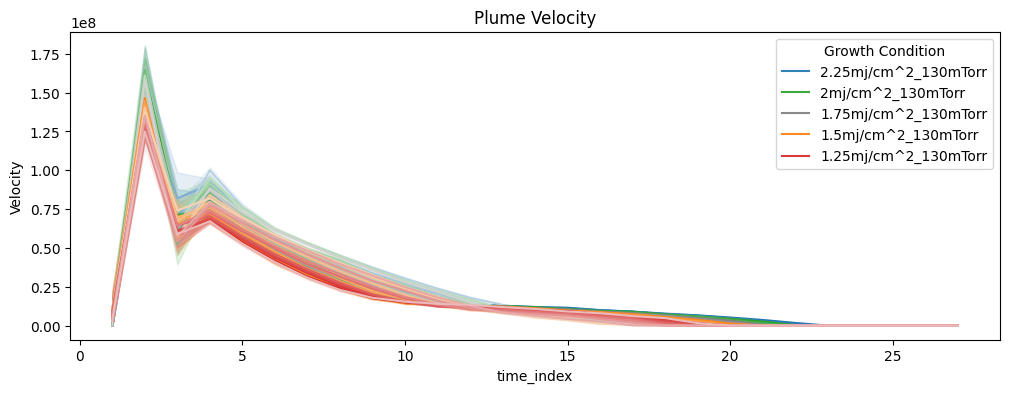

In [ ]:
df_plot = df_all

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Velocity", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Velocity')
plt.show()

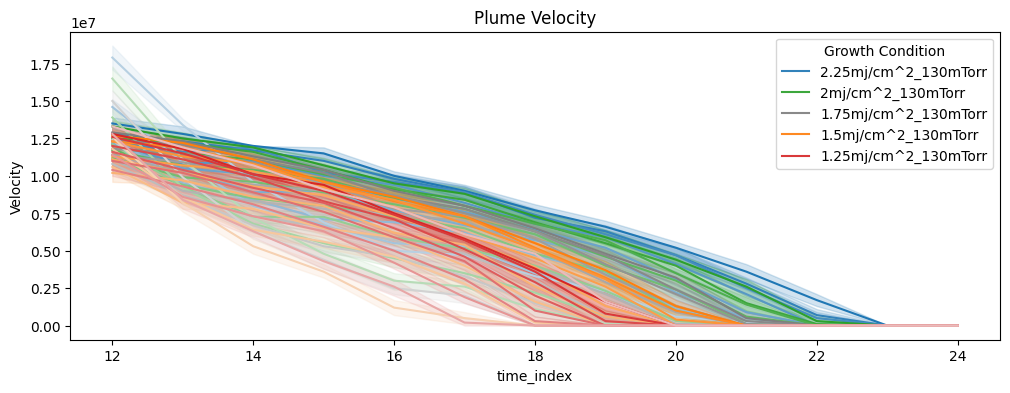

In [ ]:
df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Velocity", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Velocity')
plt.show()

### plume area

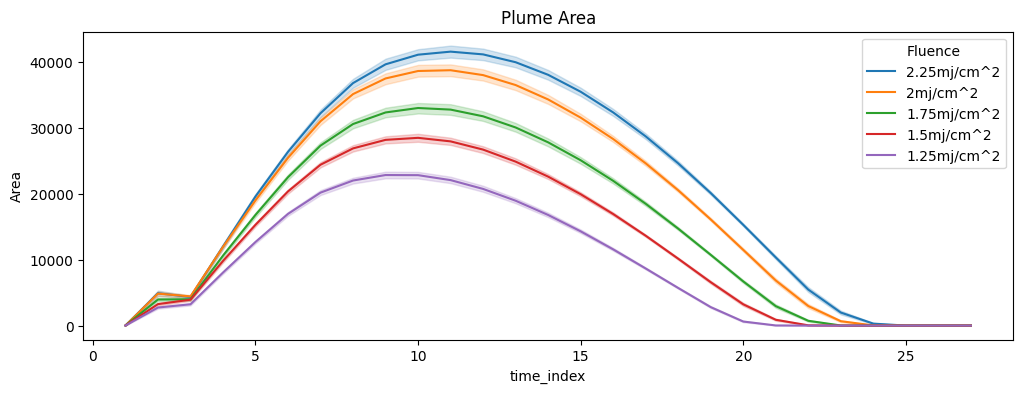

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Fluence", data=df_plot)
plt.title('Plume Area')
plt.show()

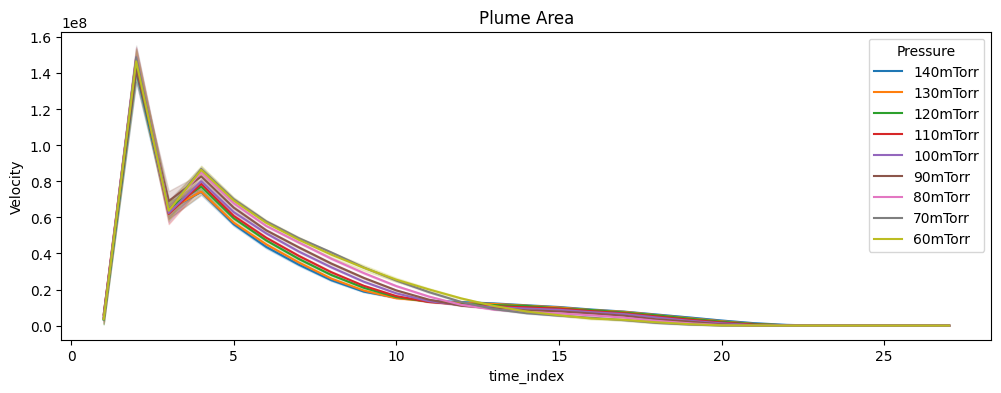

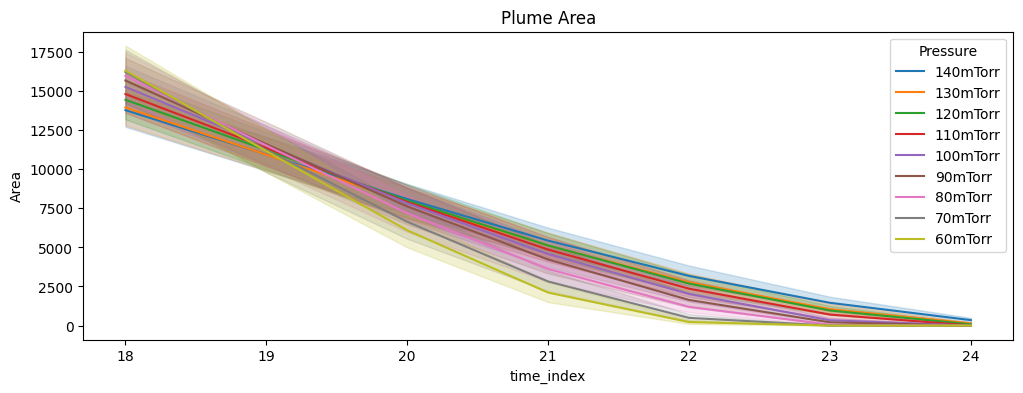

In [ ]:
df_plot = df_all
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Pressure", data=df_plot)
plt.title('Plume Area')
plt.show()

df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>17]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<25]
df_plot
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Pressure", data=df_plot)
plt.title('Plume Area')
plt.show()

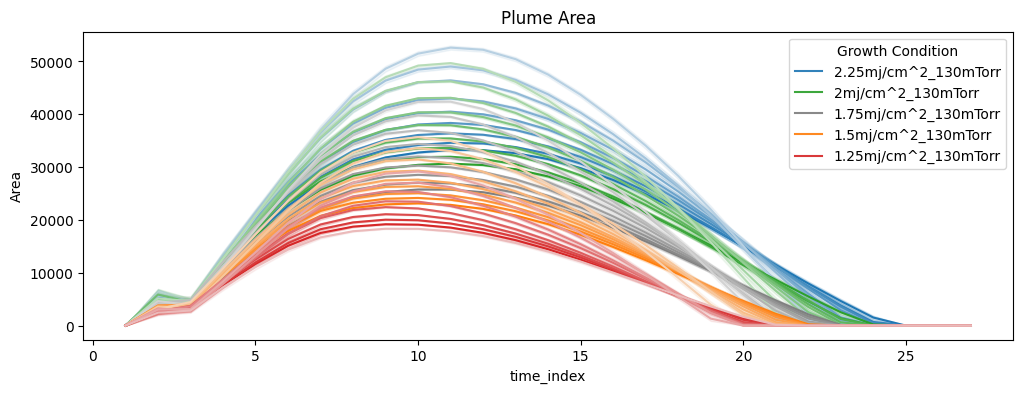

In [ ]:
df_plot = df_all

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Area", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Area')
plt.show()

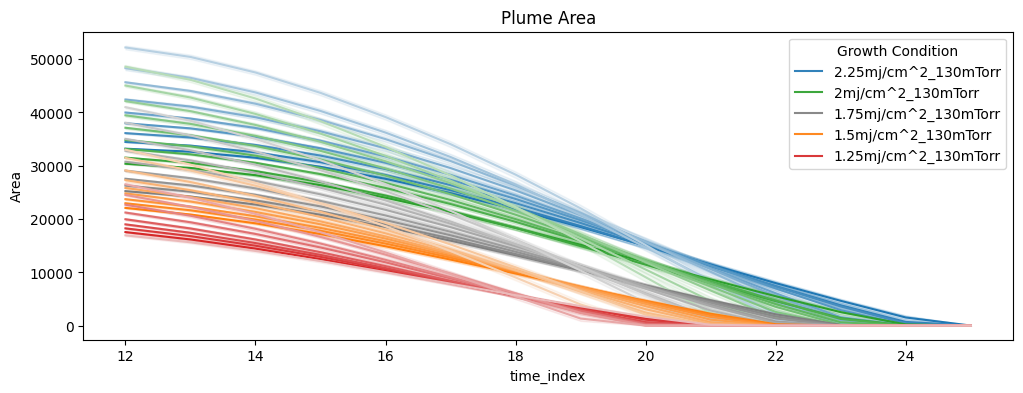

In [ ]:
df_plot = df_all
df_plot = df_plot[df_plot.index.get_level_values('time_index')>11]
df_plot = df_plot[df_plot.index.get_level_values('time_index')<26]
df_plot

fig, ax = plt.subplots(figsize=(12, 4))
lineplot  = sns.lineplot(x="time_index", y="Area", hue="Growth Condition", data=df_plot, palette=all_colors)

handles, labels = lineplot.get_legend_handles_labels()
selected_handles = handles[1:46:9]  # Skipping the first handle which is the title
selected_labels = labels[1:46:9]  # Skipping the first label which is the title
plt.legend(selected_handles, selected_labels, title='Growth Condition')

plt.title('Plume Area')
plt.show()